C:\Users\Aitha Nushith\AppData\Local\Temp\ipykernel_12920\2701086751.py:22: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



DataFrame Consist the data from the dates:
2010-06-29 00:00:00 2019-03-15 00:00:00
The Total No Of days are : 3181 days 00:00:00


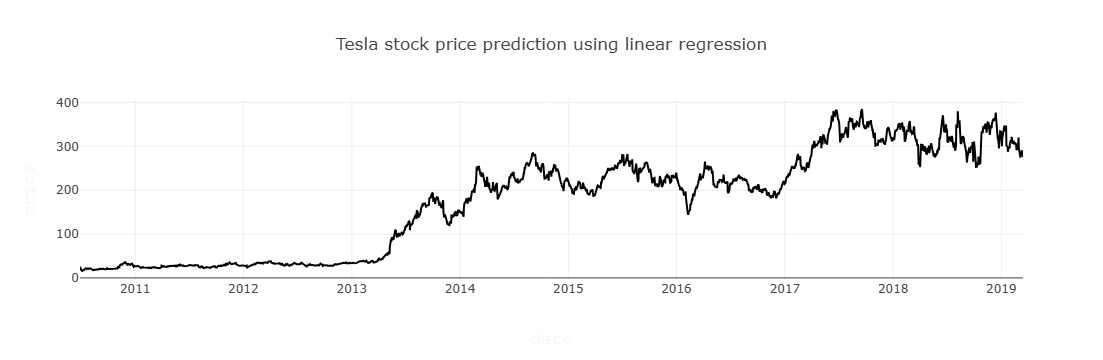

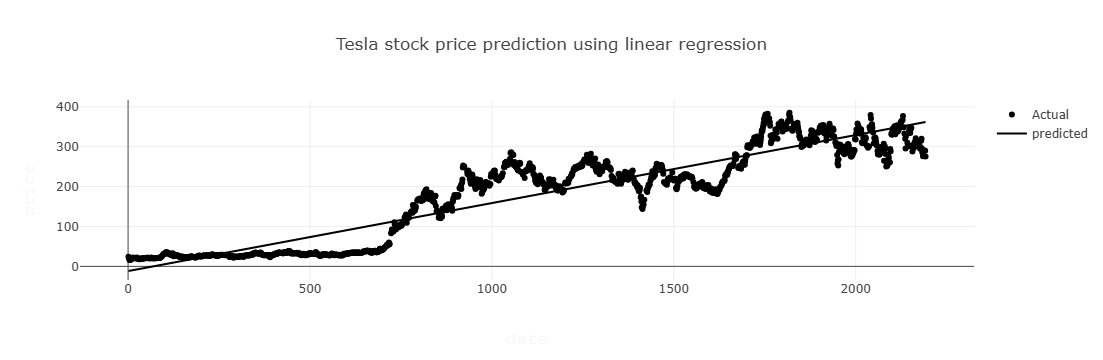

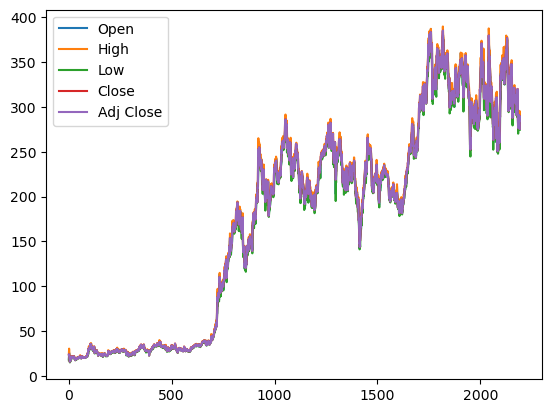

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ma
import streamlit as st
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.offline as plot
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import yfinance as yf
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as e
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#t = pd.read_csv("tesla.csv")
t=pd.read_csv('tesla.csv')
t.reset_index(inplace=True)
t['Date']= pd.to_datetime(t['Date'])
print("DataFrame Consist the data from the dates:")
min_date=t.Date.min()
max_date=t.Date.max()
print(min_date,max_date)
print("The Total No Of days are :" ,max_date-min_date)
t[['Open','High','Low','Close','Adj Close']].plot(kind='line')
layout = go.Layout(
    title='Tesla stock price prediction using linear regression',
    xaxis=dict(
        title='date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#f7f7f7'
        )
    ),
    yaxis=dict(
        title='price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#f7f7f7'
        )
    )
)
t_d = [{'x': t['Date'], 'y': t['Close']}]
plot = go.Figure(data=t_d, layout=layout)
iplot(plot)
X=np.array(t.index).reshape(-1,1)
Y=t['Close']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
scaler = StandardScaler().fit(x_train)
lm = LinearRegression()
lm.fit(x_train,y_train)
t1=go.Scatter(
    x=x_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)
t2=go.Scatter(
    x=x_train.T[0],
    y=lm.predict(x_train).T,
    mode='lines',
    name='predicted'
)
t_d=[t1,t2]
plot2=go.Figure(data=t_d,layout=layout)
iplot(plot2)

